# <font color='black'>Iphone Purchase Prediction</font>

## Import Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

## Load Dataset

In [2]:
df = pd.read_csv('iphone_purchase_records.csv')
df.shape #shape of dataset

(400, 4)

In [3]:
df.head() #first 5 rows of dataset

,Gender,Age,Salary,Purchase Iphone
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [4]:
#statistical data about dataset
df.describe()

,Age,Salary,Purchase Iphone
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [5]:
#Datatypes of features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   Salary           400 non-null    int64 
 3   Purchase Iphone  400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


In [6]:
#Check no. of unique values in each feature
df.apply(lambda x: len(x.unique()))

Gender               2
Age                 43
Salary             117
Purchase Iphone      2
dtype: int64

In [7]:
#Check Null values in each feature
df.isnull().sum()

Gender             0
Age                0
Salary             0
Purchase Iphone    0
dtype: int64

# Exploratory Data Analysis

<AxesSubplot:xlabel='Salary', ylabel='Density'>

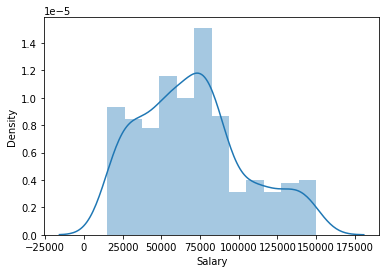

In [8]:
sns.distplot(df['Salary'])

<AxesSubplot:xlabel='Age', ylabel='Density'>

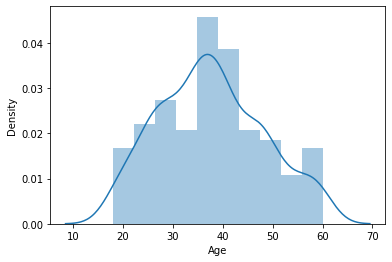

In [9]:
sns.distplot(df['Age'])

<AxesSubplot:xlabel='Gender', ylabel='count'>

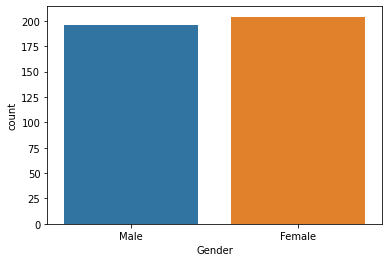

In [10]:
sns.countplot(df['Gender'])

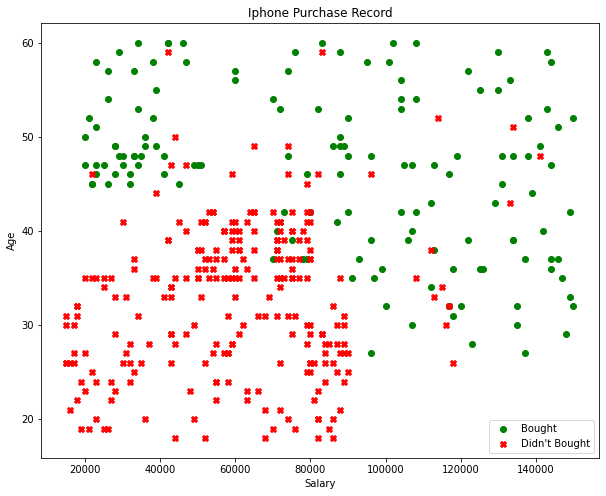

In [11]:
pos = df['Purchase Iphone'] == 1
neg = df['Purchase Iphone'] == 0
plt.figure(figsize=[10,8])
plt.scatter(df['Salary'][pos],df['Age'][pos], marker='o', c='g', label = 'Bought')
plt.scatter(df['Salary'][neg],df['Age'][neg], marker='X', c='r', label = 'Didn\'t Bought')
plt.xlabel('Salary')
plt.ylabel('Age')
plt.title('Iphone Purchase Record')
plt.legend()

# PreProcessing

In [12]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

In [13]:
X = df[['Gender','Age','Salary']].values
y = df['Purchase Iphone'].values

In [14]:
#Scaler Transform
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

# Training the Classisfication Model

In [15]:
#Splitting the dataset into Training and Test set
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y, test_size=1/5, random_state=0)

In [16]:
#Fitting the model
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

# Evaluation using Confusion Matrix

In [17]:
y_pred = model.predict(X_test)

In [18]:
#Creating a confusion matrix
cnf_matrix = confusion_matrix(y_test,y_pred)
cnf_matrix

array([[56,  2],
       [ 4, 18]], dtype=int64)

Text(33.0, 0.5, 'Actual label')

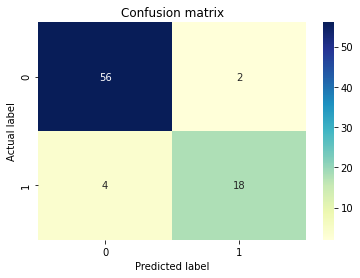

In [19]:
#Creating a heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu")
plt.title('Confusion matrix')
plt.xlabel('Predicted label')
plt.ylabel('Actual label')

In [20]:
print("Accuracy:",accuracy_score(y_test, y_pred))
print("Precision:",precision_score(y_test, y_pred))
print("Recall:",recall_score(y_test, y_pred).round(3))
print("F1 Score:",f1_score(y_test,y_pred).round(3))

Accuracy: 0.925
Precision: 0.9
Recall: 0.818
F1 Score: 0.857


# Prediction 

In [21]:
#We have to transform the raw input first
x1 = sc.transform([[1,21,40000]])
x2 = sc.transform([[1,21,80000]])
x3 = sc.transform([[0,21,40000]])
x4 = sc.transform([[0,21,80000]])
x5 = sc.transform([[1,41,40000]])
x6 = sc.transform([[1,41,80000]])
x7 = sc.transform([[0,41,40000]])
x8 = sc.transform([[0,41,80000]])

In [22]:
print("Male aged 21 making $40k will buy iPhone:", model.predict(x1))
print("Male aged 21 making $80k will buy iPhone:", model.predict(x2))
print("Female aged 21 making $40k will buy iPhone:", model.predict(x3))
print("Female aged 21 making $80k will buy iPhone:", model.predict(x4))
print("Male aged 41 making $40k will buy iPhone:", model.predict(x5))
print("Male aged 41 making $80k will buy iPhone:", model.predict(x6))
print("Female aged 41 making $40k will buy iPhone:", model.predict(x7))
print("Female aged 41 making $80k will buy iPhone:", model.predict(x8))

Male aged 21 making $40k will buy iPhone: [0]
Male aged 21 making $80k will buy iPhone: [0]
Female aged 21 making $40k will buy iPhone: [0]
Female aged 21 making $80k will buy iPhone: [0]
Male aged 41 making $40k will buy iPhone: [0]
Male aged 41 making $80k will buy iPhone: [1]
Female aged 41 making $40k will buy iPhone: [0]
Female aged 41 making $80k will buy iPhone: [0]
